In [28]:
!pip install matplotlib

1/1 [==============================] - 1s 735ms/step



start man in yellow kayak is in the ocean end


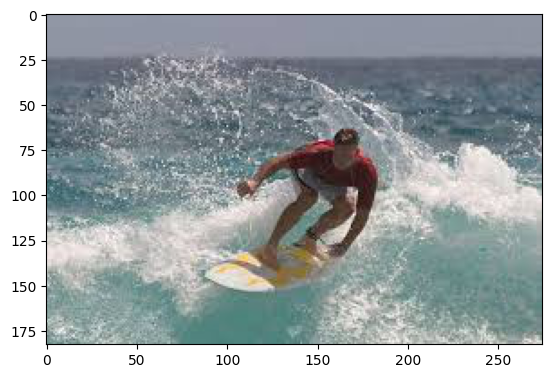

In [29]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse
import sys
import pickle
from keras.utils import pad_sequences

# Define a function to simulate command-line arguments
def set_argv(image_path):
    sys.argv = ["", "-i", image_path]

# Set the path to your image
image_path = "test/2.jpeg"

# Set command-line arguments
set_argv(image_path)

# Now you can run the rest of your script

ap = argparse.ArgumentParser()
ap.add_argument('-i', '--image', required=True, help="Image Path")
args = vars(ap.parse_args())
img_path = args['image']

def extract_features(filename, model):
        try:
            image = Image.open(filename)

        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
         if index == integer:
             return word
    return None


def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text

max_length = 32
with open("tokenizer.p", "rb") as f:
    tokenizer = pickle.load(f)
# Load model
from tensorflow.keras.models import load_model
model = load_model('models/model_9.h5')
# Load Xception model
from tensorflow.keras.applications import Xception
xception_model = Xception(include_top=False, pooling="avg")

photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
print("\n\n")
print(description)
plt.imshow(img)

In [30]:
!pip install pyttsx3

In [31]:
import pyttsx3
# initialize Text-to-speech engine
engine = pyttsx3.init()
# convert this text to speech
engine.say(description)
# play the speech
engine.runAndWait()